In [63]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
def f(x):
    return 3 * x**2 - 4 * x + 5


f(3.0)

20.0

In [65]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [66]:
np.arange(-5, 5, 20), np.linspace(-5, 5, 20)

(array([-5]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]))

In [67]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

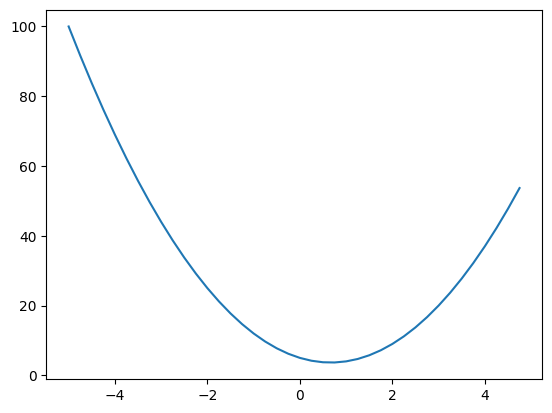

In [68]:
plt.plot(xs, ys)

In [69]:
h = 0.00000000000001
x = 3

print(
    f"f(x + h): {f(x + h)}, \nf(x): {f(x)},\nf(x + h)-f(x): {f(x + h)-f(x)}, \nslope:(f(x + h)-f(x))/h: {(f(x + h)-f(x))/h}"
)

f(x + h): 20.000000000000142, 
f(x): 20,
f(x + h)-f(x): 1.4210854715202004e-13, 
slope:(f(x + h)-f(x))/h: 14.210854715202004


In [70]:
# derivateive of f(x): 6x-4
6 * (3) - 4

14

In [71]:
h = 0.00000000000001
x = -3

print(
    f"f(x + h): {f(x + h)}, \nf(x): {f(x)},\nf(x + h)-f(x): {f(x + h)-f(x)}, \nslope:(f(x + h)-f(x))/h: {(f(x + h)-f(x))/h}"
)

f(x + h): 43.99999999999978, 
f(x): 44,
f(x + h)-f(x): -2.2026824808563106e-13, 
slope:(f(x + h)-f(x))/h: -22.026824808563106


In [72]:
# derivateive of f(x): 6x-4
6 * (-3) - 4

-22

In [73]:
# lets get more complex

a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [74]:
# computing derivative for a
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0


d1 = a * b + c
print(f"d1: {d1}")

# so for derivative w.r.t a
# so we only bumped a
a += h
d2 = a * b + c
print(f"d2: {d2}")


print(f"slope: {(d2-d1)/h}")

d1: 4.0
d2: 3.999699999999999
slope: -3.000000000010772


In [75]:
#  for b

# inputs
a = 2.0
b = -3.0
c = 10.0


d1 = a * b + c
print(f"d1: {d1}")

# so for derivative w.r.t a
# so we only bumped a
b += h
d2 = a * b + c
print(f"d2: {d2}")


print(f"slope: {(d2-d1)/h}")

d1: 4.0
d2: 4.0002
slope: 2.0000000000042206


In [76]:
#  for c

# inputs
a = 2.0
b = -3.0
c = 10.0


d1 = a * b + c
print(f"d1: {d1}")

# so for derivative w.r.t a
# so we only bumped a
c += h
d2 = a * b + c
print(f"d2: {d2}")


print(f"slope: {(d2-d1)/h}")

d1: 4.0
d2: 4.0001
slope: 0.9999999999976694


In [77]:
# visualize graph

from graphviz import Digraph


def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root, format="svg", rankdir="LR"):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ["LR", "TB"]
    nodes, edges = trace(root)
    dot = Digraph(
        format=format, graph_attr={"rankdir": rankdir}
    )  # , node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(
            name=str(id(n)),
            label="{ %s| data %.4f | grad %.4f }" % (n.label, n.data, n.grad),
            # label="{ %s| data %.4f  }" % (n.label, n.data),
            shape="record",
        )
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [78]:
#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out


Value(10)

Value(data=10)

In [79]:
a, b, c = Value(2.0), Value(-3.0), Value(10.0)
a * b + c

Value(data=4.0)

In [80]:
a + b  # a.__add__(b

Value(data=-1.0)

In [81]:
# self._prev:  but how are we going to show connectiveness of these numbers as we want to keep expression graphs. to keep track of what values produce other values
# _op='': to track which operation on children created new node


#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(
            self.data + other.data, (self, other), "+"
        )  # here (self, other) are _children
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh
        out = Value(t, (self,), "tanh")
        return out


a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
d = a * b + c
d.label = "d"
d

Value(data=4.0)

In [82]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [83]:
d._op

'+'

-8.0


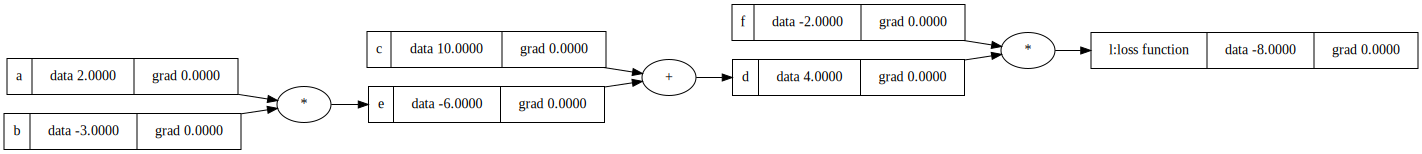

In [84]:
a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
e = a * b
e.label = "e"
d = e + c
d.label = "d"
f = Value(-2.0, label="f")
L = d * f
L.label = "l:loss function"

print(L.data)
draw_dot(L)

# loss function actually works with weights, not values

# so we'll be calcualting derivative of L with each node. so we might add g in __init__ as it would be for each node

In [85]:
# grad value for each node is `change in Loss w.r.t change in that node`:  dL/d(that node)

so

1. dL/dL will be 1
2.


In [86]:
# 1. dL/dL


def lol():

    h = 0.0001

    a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L1 = L.data

    # dL/dL
    a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L2 = L.data + h

    print((L2 - L1) / h)


lol()


# so for Nodel L~ dL/dL ~ L.grad=  1

L.grad = 1.0

0.9999999999976694


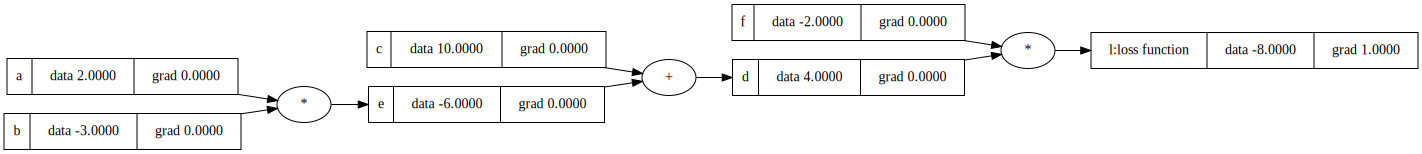

In [87]:
draw_dot(L)

In [88]:
# 1. dL/dd

"""
L=d*f
dL/dd =?

as we are changing d, so x = d and x+h would be d+h

as fomrula of derivative goes
(f(x+h) - f(x))/h
putting values as L is d*f

((d+h)*f - (d*f))/h
(d*f + h*f - d*f)/h
(h*f)/h
f

"""


#########################3 just for confirmation


def dlbydd():

    h = 0.0001

    a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"

    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L1 = L.data

    d = Value(d.data + h, label="f")

    L = d * f
    L.label = "l:loss function"
    L2 = L.data
    # print(L2 - L1)

    print((L2 - L1) / h)


dlbydd()


#########################3 just for confirmation


def dlbydf():

    h = 0.0001

    a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"

    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L1 = L.data

    f = Value(f.data + h, label="f")

    L = d * f
    L.label = "l:loss function"
    L2 = L.data
    # print(L2 - L1)

    print((L2 - L1) / h)


dlbydf()

f.grad = 3.9999999

d.grad = -1.9999999

-1.9999999999953388
3.9999999999995595


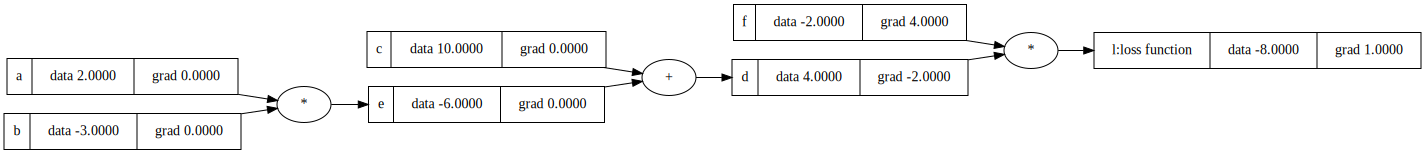

In [89]:
draw_dot(L)

In [90]:
# c.grad

# chain rule dL/dc = dL / dd * dd / dc


# so for dd/dc
"""
d = e + c


(f(x + h) - f(x)) / h


((e + c + h) - (e + c)) / h

so, dd/dc = 1


so for chain rule,

dL/dc = dL / dd * dd / dc


"""

c.grad = -2
e.grad = -2

In [91]:
# 1. dL/da


# alternative
def lol():

    h = 0.0001

    a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L1 = L.data

    # dL/dL
    e = Value(e.data + h, label="e")
    # e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L2 = L.data

    print((L2 - L1) / h)


lol()


a.grad = 6.000000000021544
b.grad = -4.000000000008441

-1.9999999999953388


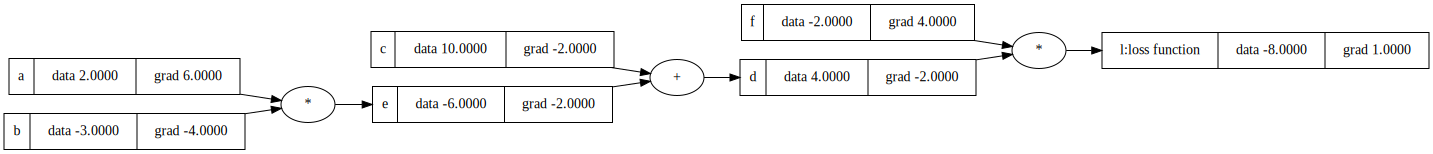

In [92]:
draw_dot(L)

## optimization step


-7.286496003715976


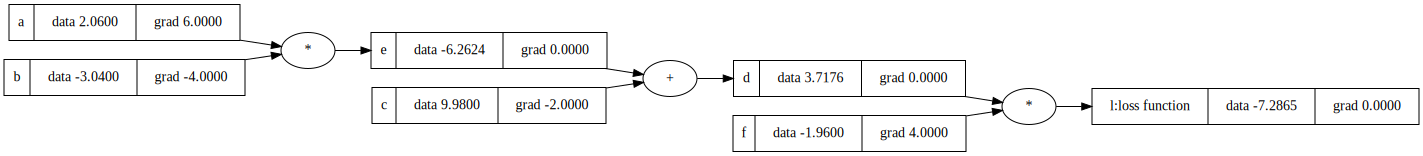

In [93]:
# optimization step
# Let L go up


a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad


# forward pass

e = a * b
e.label = "e"
d = e + c
d.label = "d"
L = d * f
L.label = "l:loss function"
print(L.data)
draw_dot(L)

# backpropagate through neuron


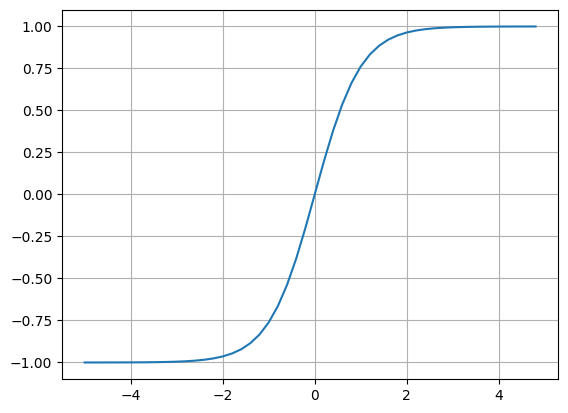

In [94]:
# activation function is usually squashing function
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()

In [95]:
#  a neuron with two inputs: x1,x2

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
b = Value(6.88137358, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1x2w2"
# adding bias
n = x1w1x2w2 + b
n.label = "n"
# activation function
o = n.tanh()
o.label = "o"

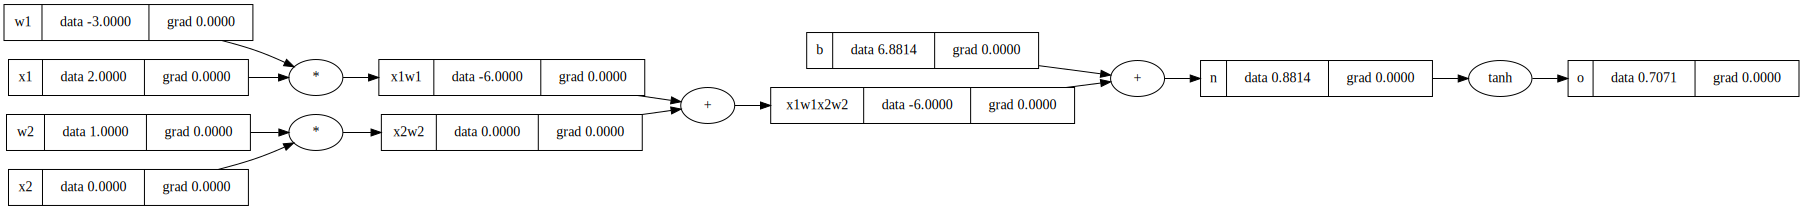

In [96]:
draw_dot(o)

In [97]:
# lets do backpropagation

o.grad = 1.0

In [98]:
o.data

0.707106777676776

In [99]:
# backpropagate through tanh

#  o =tanh(n)

# then what is

# do/dn = d(tanh(n))/dn    = 1-(tanh(n))^2

# so its just: 1- o**2


1 - o.data**2

# so do/dn =

n.grad = 0.50000


# as + is just a distribuot of gradients
# + mean both exps have positive effect on ouput

x1w1x2w2.grad = 0.50000

b.grad = 0.50000

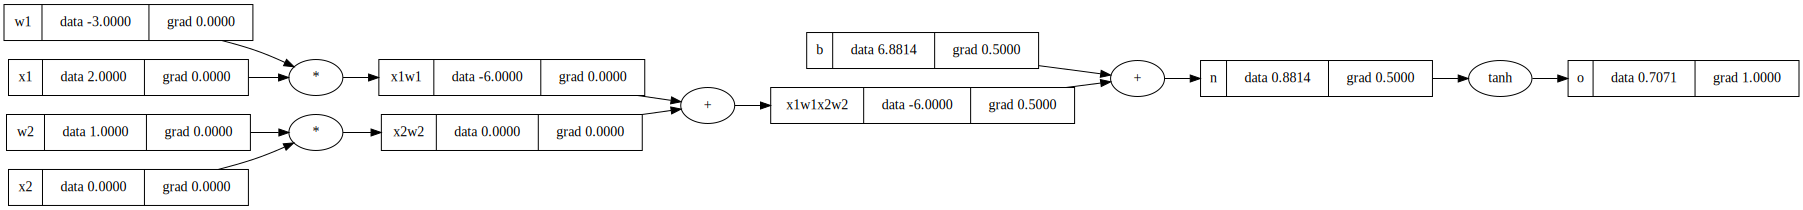

In [100]:
draw_dot(o)

In [101]:
#  as its again +, so

# + mean both exps have positive effect on ouput

x1w1.grad = 0.50000
x2w2.grad = 0.50000


#  for x2

x2.grad = w2.data * x2w2.grad  # x2w2.grad is chain of gradients from o

w2.grad = (
    x2.data * x2w2.grad
)  # 0 because x2 is 0   # because weight works accoring to input


#  for x1

x1.grad = w1.data * x1w1.grad  # x1w1.grad is chain of gradients from o

w1.grad = x1.data * x1w1.grad

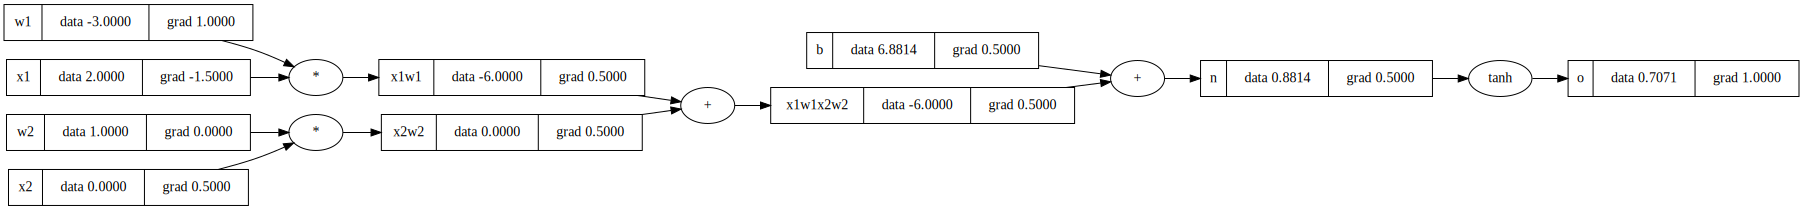

In [102]:
draw_dot(o)

## Add backward functionality in Value


In [103]:
# self._prev:  but how are we going to show connectiveness of these numbers as we want to keep expression graphs. to keep track of what values produce other values
# _op='': to track which operation on children created new node


#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self._backward = (
            lambda: None
        )  # for chain rule but by default it doesnot do anything  # a case for leaf node
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(
            self.data + other.data, (self, other), "+"
        )  # here (self, other) are _children

        def _backward():
            self.grad = 1.0 * out.grad  # 1.0 for addition
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad = other.data * out.grad  # 1.0 for addition
            other.grad = self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad = (1 - t**2) * out.data

        out._backward = _backward
        return out


a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
d = a * b + c
d.label = "d"
d

Value(data=4.0)

In [104]:
#  a neuron with two inputs: x1,x2

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
b = Value(6.88137358, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1x2w2"
# adding bias
n = x1w1x2w2 + b
n.label = "n"
# activation function
o = n.tanh()
o.label = "o"


# backward
o.grad = 1.0
o._backward()

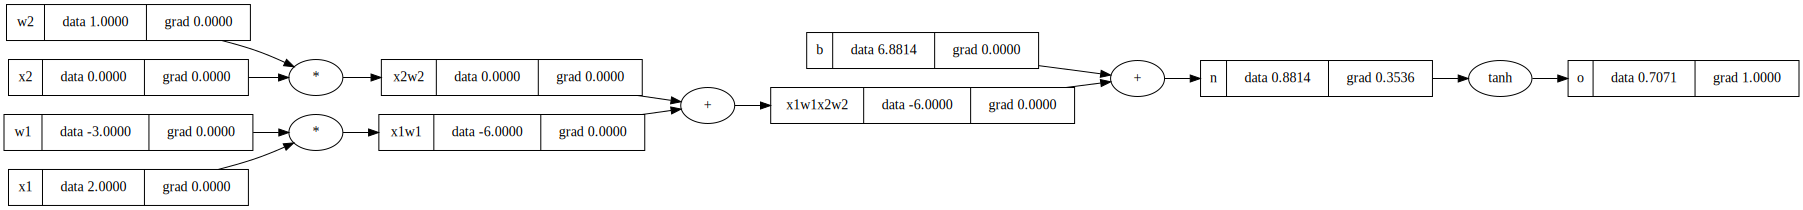

In [105]:
draw_dot(o)

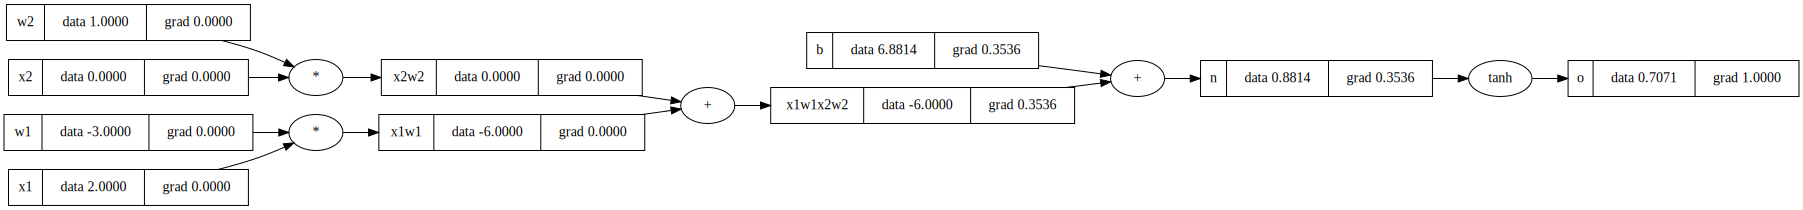

In [106]:
# backward
n._backward()
draw_dot(o)

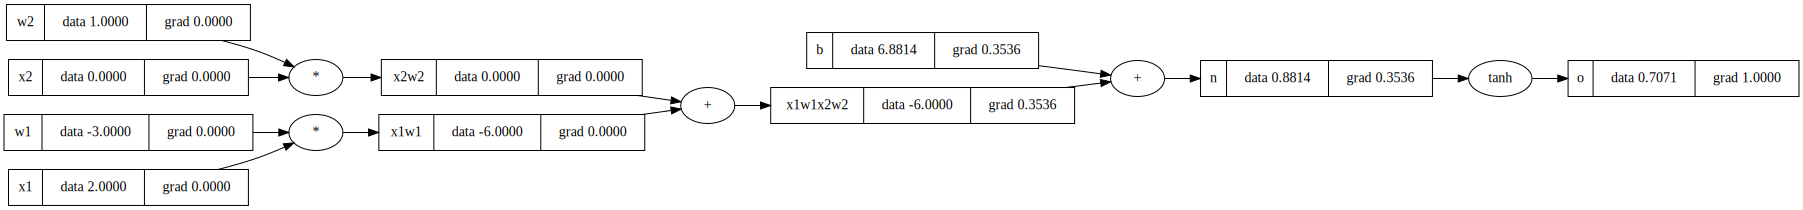

In [107]:
# backward
b._backward()
draw_dot(o)

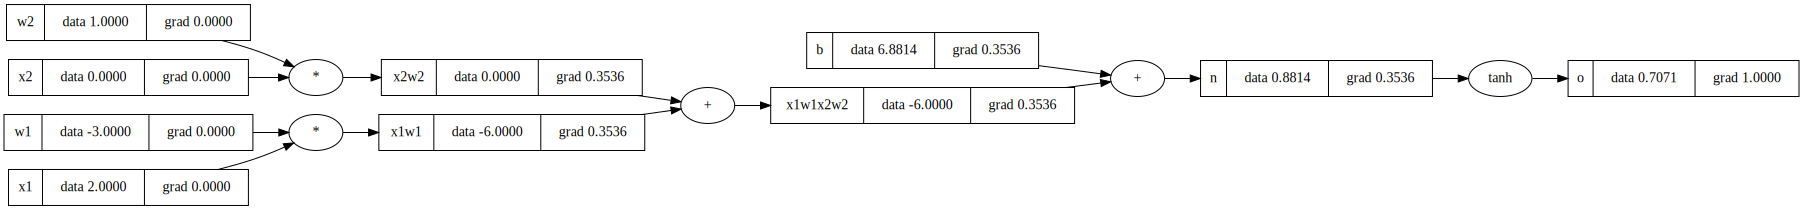

In [108]:
x1w1x2w2._backward()
draw_dot(o)

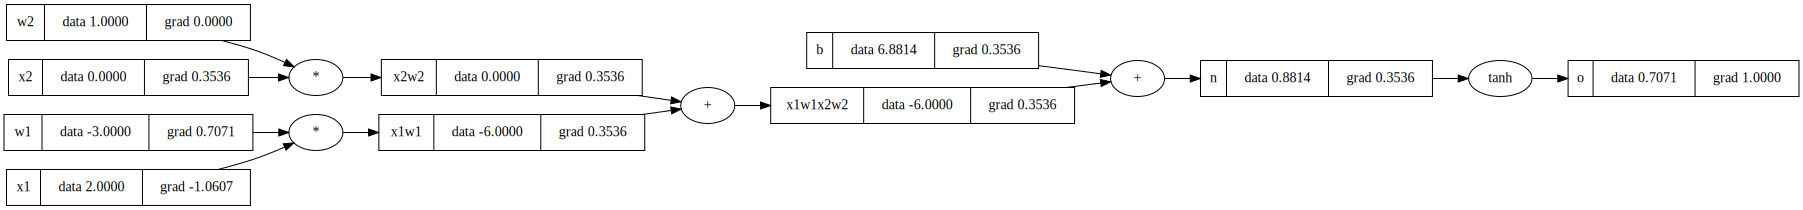

In [109]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

## before calling backward we need to make sure that all other dependencies are already filled.

### so we can achieve this ordering of graph using topological sort. It make sures all edges go to one way from left->right


In [110]:
topo = []
visited = set()


def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)

        topo.append(v)


build_topo(o)
topo

[Value(data=6.88137358),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.88137358),
 Value(data=0.707106777676776)]

#### so if wejust reset our gradients


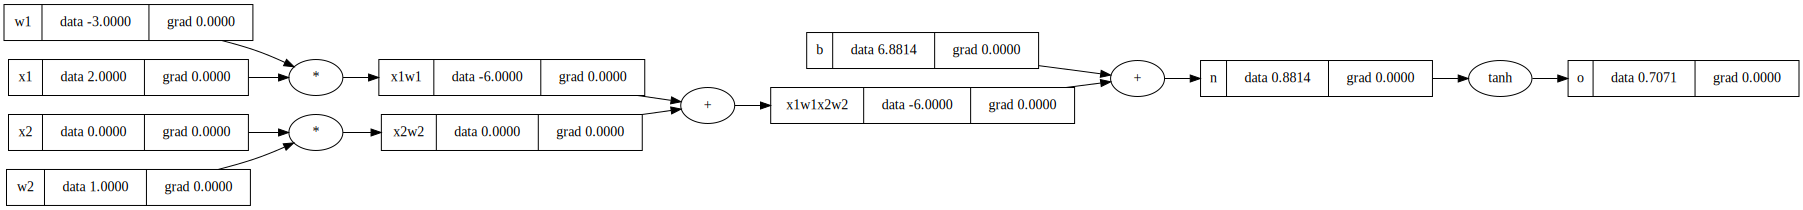

In [111]:
#  a neuron with two inputs: x1,x2

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
b = Value(6.88137358, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1x2w2"
# adding bias
n = x1w1x2w2 + b
n.label = "n"
# activation function
o = n.tanh()
o.label = "o"


draw_dot(o)

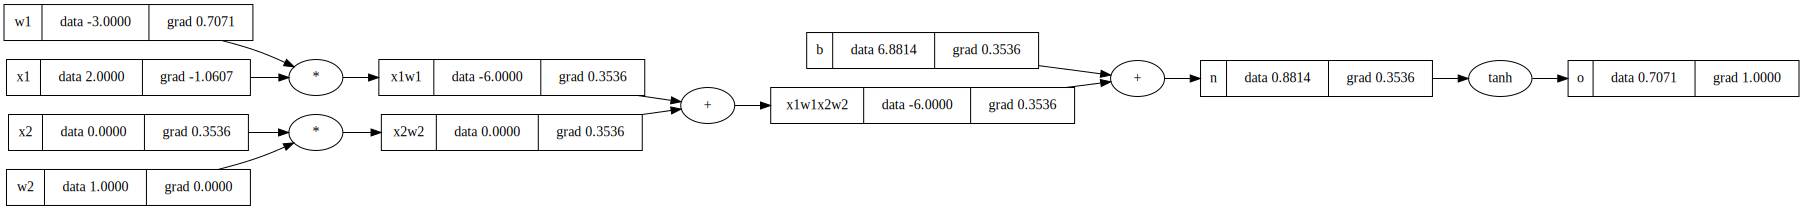

In [112]:
# backward
o.grad = 1.0


# topological ordering

topo = []
visited = set()


def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)

        topo.append(v)


build_topo(o)  # o would be at last o list


#
for node in reversed(topo):
    node._backward()

draw_dot(o)

## integrating backward into Value


In [113]:
# self._prev:  but how are we going to show connectiveness of these numbers as we want to keep expression graphs. to keep track of what values produce other values
# _op='': to track which operation on children created new node


#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self._backward = (
            lambda: None
        )  # for chain rule but by default it doesnot do anything  # a case for leaf node
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(
            self.data + other.data, (self, other), "+"
        )  # here (self, other) are _children

        def _backward():
            self.grad = 1.0 * out.grad  # 1.0 for addition
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad = other.data * out.grad  # 1.0 for addition
            other.grad = self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad = (1 - t**2) * out.data

        out._backward = _backward
        return out

    def backward(self):

        # topological ordering

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)

                topo.append(v)

        build_topo(self)  # o would be at last o list

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
d = a * b + c
d.label = "d"
d

Value(data=4.0)

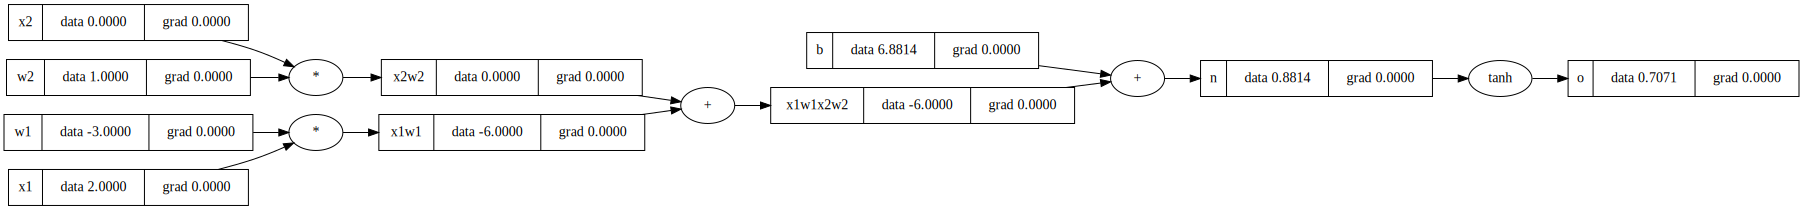

In [114]:
#  a neuron with two inputs: x1,x2

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
b = Value(6.88137358, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1x2w2"
# adding bias
n = x1w1x2w2 + b
n.label = "n"
# activation function
o = n.tanh()
o.label = "o"


draw_dot(o)

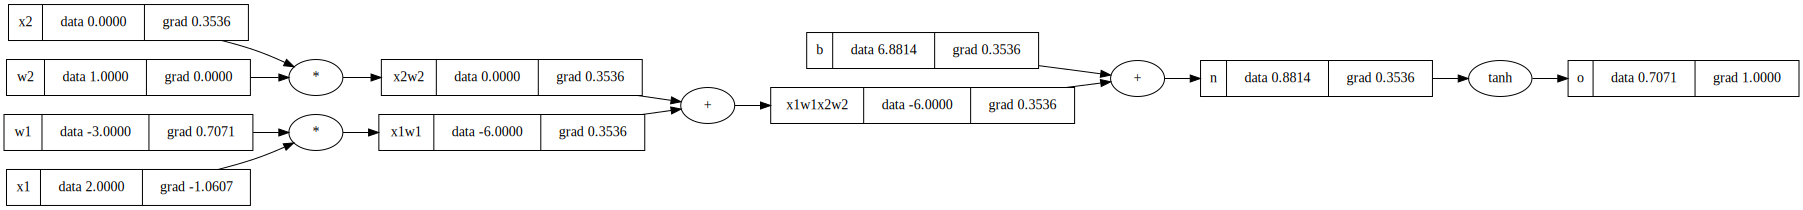

In [115]:
o.backward()

draw_dot(o)

## but there is a bug


gradient is not correct .. here grad w.r.t a should be 2.0 not 1.0 becasue in **add** functionality self and other are same object so they are overwritinng each other.


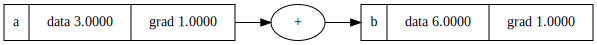

In [116]:
a = Value(3.0, label="a")
b = a + a
b.label = "b"

b.backward()

draw_dot(b)

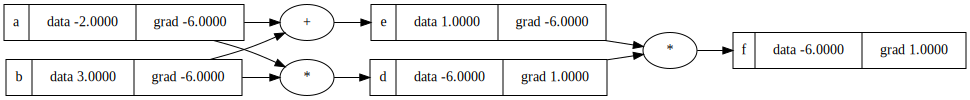

In [117]:
a = Value(-2.0, label="a")

b = Value(3.0, label="b")
d = a * b
d.label = "d"

e = a + b
e.label = "e"

f = d * e
f.label = "f"

f.backward()

draw_dot(f)

so whenever we aare using a variable more than once, issue is there like in case of d e


### so we need to accumulate thee gradients

def \_backward():
self.grad += 1.0 _ out.grad  
 other.grad += 1.0 _ out.grad


In [118]:
# self._prev:  but how are we going to show connectiveness of these numbers as we want to keep expression graphs. to keep track of what values produce other values
# _op='': to track which operation on children created new node


#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self._backward = (
            lambda: None
        )  # for chain rule but by default it doesnot do anything  # a case for leaf node
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(
            self.data + other.data, (self, other), "+"
        )  # here (self, other) are _children

        def _backward():
            self.grad += 1.0 * out.grad  # 1.0 for addition
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad  # 1.0 for addition
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.data

        out._backward = _backward
        return out

    def backward(self):

        # topological ordering

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)

                topo.append(v)

        build_topo(self)  # o would be at last o list

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
d = a * b + c
d.label = "d"
d

Value(data=4.0)

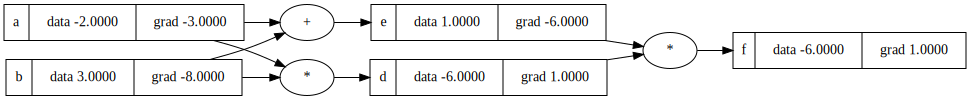

In [119]:
a = Value(-2.0, label="a")

b = Value(3.0, label="b")
d = a * b
d.label = "d"

e = a + b
e.label = "e"

f = d * e
f.label = "f"

f.backward()

draw_dot(f)

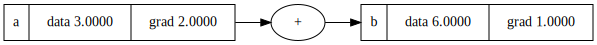

In [120]:
a = Value(3.0, label="a")
b = a + a
b.label = "b"

b.backward()

draw_dot(b)